# Evaluating the Utility of NASA MODIS Satellite Aerosol Optical Depth Measurements to Detect Brick Kiln Black Carbon Emissions Reductions
by Tobias Schultz, Vice President of Research & Development at SCS Global Services
May 5, 2022
## Observing if any trend in Aerosol Optical Depth (AOD) over Nepal following the 2015 earthquake can be observed
On April 25, 2015, 350 of Nepal's 800 brick kilns were completely or partially affected by a magnitude 7.8 earthquake. 105 of these were in the Kathmandu valley. There could not be a larger emissions reduction "event" in the recent history of this country, and all emissions from the Nepalese brick kiln industry in Nepal (including aerosols like black carbon and SOx) must surely have dropped significantly. These aerosols have both significant human health effects, but also climate forcing effects. A reasonable estimate would be that emissions dropped roughly 350/800 = 44% or so, at least for a short period of time, following this earthquake. 

Indeed, according to the World Bank<sup>[1]</sup>, the overall CO2 emissions of Nepal decreased from 7.1 million tons CO2 in 2014 to 6.5 million tons in 2015 - a 10% reduction that is quite noteworthy because it is the only year since 2006 that recorded any emissions reduction at all.<sup>[2]</sup> 

Being able to remotely verify changes in emissions levels is of high interest to SCS Global Services, a 3rd party environmental certification body. If SCS would be able to use readily available and frequently updated remote sensing data to verify that the emissions reductions were achieved for a given mitigation project, this would be very valuable. For example, SCS is interested in verifying the Black Carbon and Particulate Matter emissions reductions from brick kilns whih are retrofit in Nepal -- is this possible with remote sensing data?  

The 2015 Nepal earthquake serves as a perfect natural experiment to observe the ability of various remote sensing networks to detect reductions in emissions or aerosols like Black Carbon and other particulate matter. If a remote sensing network measures no statistically significant reduction in pollutant concentrations immediately after the April 25, 2015 earthquake, this remote sensing will surely be totally unable to detect smaller magnitude changes which occur as a result of technology improvements such as brick kiln retrofits, which achieve a relatively smaller overall magnitude emission reductions, which are spread out over a longer period of time.  

I will use this natural experiment to evaluate if remote sensing technologies can detect aerosol emissions reductions. To focus on a region which appeared to be an epicenter for destruction, I will examine impacts on AOD and PM2.5 concentrations in the Kathmandu valley before and after April 25, 2015. I will use the following remote sensing networks:

* The NASA MODIS satellite's Aerosol Optical Depth dataset. I will use the 8-day temporal resolution dataset, which appears to include complete coverage minus cloud cover for Nepal. 

My hypothesis is that a statistically significant decrease in proxy measures of particulates and black carbon (AOD and PM measures, respectively for MODIS and sensor based data) is observable before and after the April 25, 2015 earthquake. If such a decrease can be observed using remote sensing data, this provides some promise that it could be applied to measure smaller-scale changes, as well. 

[1] https://www.macrotrends.net/countries/NPL/nepal/carbon-co2-emissions  
[2] A study published by Pankaj, et al, does not detect this reduction, but it lacked primary data covering the 2014-2016 period, instead basing estimates on a 2011 census and 2012 and 2014 surveys, and interpolated for missing years. This kind of data would not pick up a short-term event in 2015. https://acp.copernicus.org/articles/19/12953/2019/ 


# Methodology
I will access NASA MODIS grid-cell level data, focused on a 0.5x0.5 degree area centered the Kathmandu Valley. Although MODIS AOD is prepared on a daily basis, I chose to use the 8-day mosaics, as this gave good overall coverage of the entire grid cell region even considering clouds. (The median percent of pixels without coverage due to clouds was 14.5% across a 10-year period.) The only exception for this was in the monsoon season (May-September), with very cloudy conditions making the 8-day observations much less consistent.  

I will base my evaluation on the 12 months before and after the earthquake. This will "average out" seasonal variations in the data, and not evaluate a too lengthy time period after the earthquake, when emissions rebounded. I will perform two evaluations:
* A visual inspection, to see if any reduction is apparent.
* A comparison using a two-sided t-test, comparing the means of the 12-month window before and after April 25, 2015. I will use an alpha value of 0.01 (i.e., a p-value of 0.01 or less would indicate a statistically significant change).  

## Import Previously Scraped MODIS AOD Data
This data was already pulled using the script 'kathmandu_modis_aod_scraper.ipynb'. This was written into a CSV file. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

from IPython.display import display_html 
import requests

import os

In [2]:
katdf = pd.read_csv('data\\kathmandu_valley_8dayaod.csv')
katdf['Date of 8-day Window']=pd.to_datetime(katdf['Date of 8-day Window']) #Convert this column to date time. 
katdf=katdf.drop(columns=['Unnamed: 0']) #Drop this column which inserts intself


## Data Summary

In [36]:
print(f'Earlist record in the data: {np.min(katdf["Date of 8-day Window"])}')
print(f'Latest record in the data: {np.max(katdf["Date of 8-day Window"])}')
print(f'Shape of the input dataframe: {katdf.shape}')
#print(f'Info about this dataframe: {katdf.info()}')
print(f"Description of this dataframe: ")
print(f"Data types: {katdf.dtypes}")
display_html(katdf.describe())


Earlist record in the data: 2010-01-01 00:00:00
Latest record in the data: 2020-12-27 00:00:00
Shape of the input dataframe: (574, 8)
Description of this dataframe: 
Data types: Date of 8-day Window               datetime64[ns]
Centroid of Selection (Lat,Lon)            object
Number of Pixels                            int64
Average AOD                               float64
5% Percentile AOD                         float64
50% Percentile (Median) AOD               float64
95% Percentile AOD                        float64
Percent of Pixels with no Data            float64
dtype: object


,Number of Pixels,Average AOD,5% Percentile AOD,50% Percentile (Median) AOD,95% Percentile AOD,Percent of Pixels with no Data
count,574.0,472.000000,472.000000,472.000000,472.000000,574.000000
mean,100.0,0.510398,0.236072,0.531611,0.765140,37.074913
std,0.0,0.206708,0.188864,0.242100,0.236916,40.539076
min,100.0,0.100786,0.000000,0.079000,0.133465,0.000000
25%,100.0,0.358858,0.102362,0.344488,0.603150,2.000000
50%,100.0,0.497077,0.184055,0.514890,0.825197,14.500000
75%,100.0,0.650706,0.313150,0.706693,1.000000,86.000000
max,100.0,1.000000,1.000000,1.000000,1.000000,100.000000


## Visual Inspection of Trend
We have the data now for AOD spanning 11 years, from January 1, 2010, to December 27, 2020. Can we see visually if there is any change when the earthquake occurs? 

Statistics for the 12-months before and after the earthquake:


,Number of Pixels,Average AOD,5% Percentile AOD,50% Percentile (Median) AOD,95% Percentile AOD,Percent of Pixels with no Data
count,105.0,89.000000,89.000000,89.000000,89.000000,105.000000
mean,100.0,0.535196,0.253291,0.565425,0.766062,34.142857
std,0.0,0.227830,0.195950,0.268819,0.248732,38.560000
min,100.0,0.135116,0.055118,0.118110,0.248031,0.000000
25%,100.0,0.324724,0.122835,0.307087,0.586614,3.000000
50%,100.0,0.534685,0.188780,0.564961,0.869094,14.000000
75%,100.0,0.707133,0.332480,0.799213,1.000000,77.000000
max,100.0,1.000000,1.000000,1.000000,1.000000,100.000000


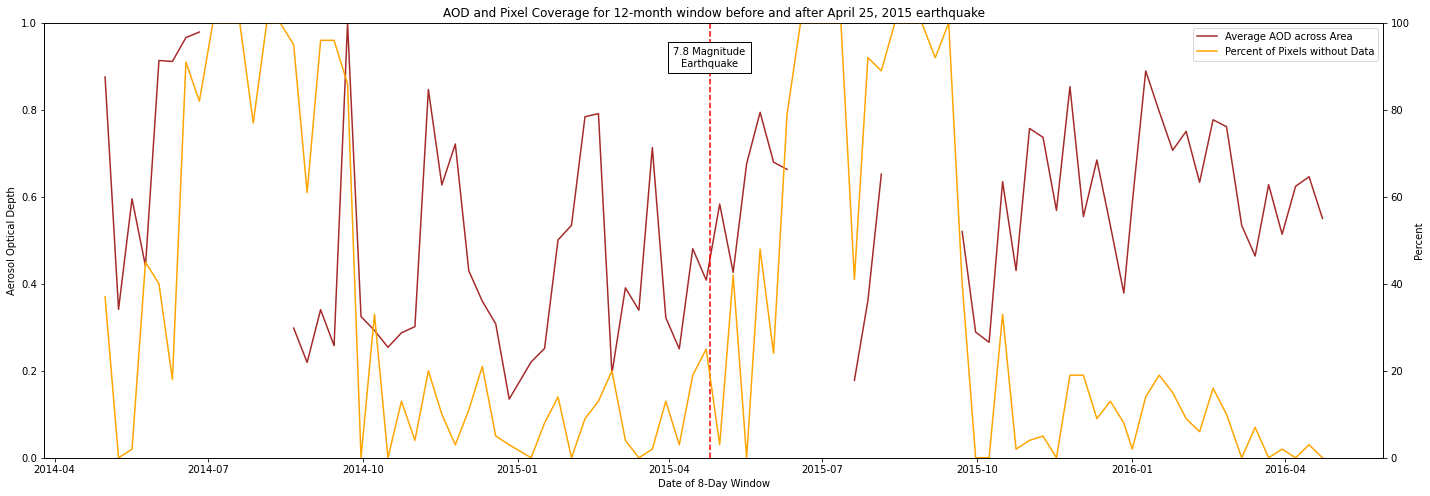

In [87]:
#Review the trend
focused = katdf[katdf['Date of 8-day Window']>'4-25-2014']
focused = focused[focused['Date of 8-day Window']<'4-25-2016']
print(f"Statistics for the 12-months before and after the earthquake:")
display_html(focused.describe())
#focused.plot(x='Date of 8-day Window',y=['Average AOD'],figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(24,8)) 
x = focused['Date of 8-day Window']
data_1=focused['Average AOD']
data_2 =focused['Percent of Pixels with no Data']
ax1.set_xlabel('Date of 8-Day Window') 
ax1.set_ylabel('Aerosol Optical Depth') 
plot_1=ax1.plot(x, data_1, color = 'brown',label="Average AOD across Area") 
plt.ylim(0, 1)
earthquakedate=pd.to_datetime("2015-4-25") #Date of Earthquake.
plt.axvline(x=earthquakedate, color='red', linestyle='--')

plt.text(earthquakedate,.9,'7.8 Magnitude\nEarthquake',horizontalalignment='center',bbox=dict(facecolor='white', alpha=1,edgecolor='black', boxstyle='square,pad=.5'))  

# Adding Twin Axes
ax2 = ax1.twinx() 
plot_2=ax2.plot(x, data_2, color = 'orange',label="Percent of Pixels without Data")  
plt.ylim(0, 100)

# Add label
plt.ylabel('Percent') 

# Add legends
lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)
# Show plot
plt.title("AOD and Pixel Coverage for 12-month window before and after April 25, 2015 earthquake")

plt.show()

Visually, there is no apparent decline which coincides with the earthquake. IN fact, the AOD increased immediately after the earthquake. 

## Test of Statistical Significance: T-Test
I will use the simple t-test for 12 months before and 12 months after the earthquake to tell if there is any significant trend that is detectable. 

In [73]:
import scipy.stats as stats
from scipy.stats.stats import pearsonr, ttest_ind

#Select hte 12 months before and after the Earthquake. 
twelve_mos_b4_quake_df=katdf[(katdf['Date of 8-day Window']>'4-25-2014') & ( katdf['Date of 8-day Window']<'4-25-2015' ) ]
twelve_mos_after_quake_df=katdf[(katdf['Date of 8-day Window']>'4-25-2015') & ( katdf['Date of 8-day Window']<'4-25-2016' ) ]

#Scrap out empty datasets, which correspond to weeks with no data. (These are obviously cloudy days.)
twelve_mos_b4_quake_df.dropna(axis=0,subset=['Average AOD'],inplace=True)
twelve_mos_after_quake_df.dropna(axis=0,subset=['Average AOD'],inplace=True)
print(f"Total number of weeks of data in the year before April 25, 2015: {len(twelve_mos_b4_quake_df)}.")
print(f"Total number of weeks of data in the year after April 25, 2015: {len(twelve_mos_after_quake_df)}.")

a_data = np.asarray(twelve_mos_b4_quake_df[['Average AOD']])
b_data = np.asarray(twelve_mos_after_quake_df[['Average AOD']]) 

"""
Using the T-test from scipy
if standard=True, perform a standard independent 2 sample t-test that 
assumes equal population variances. 
If False, perform Welch’s t-test, which does not
assume equal population variances. This is True by default.
Before we perform the test, we need to decide
if we’ll assume the two populations have equal
variances or not. As a rule of thumb, we can 
assume the populations have equal variances if 
the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 
"""
standard=True
vardif=np.var(a_data)/np.var(b_data)

if (vardif >= 4 ) or (vardif <= 0.25 ):
    standard=False
t_statistic,t_pvalue = ttest_ind(a=a_data, b=b_data, equal_var=standard)
print(f"The ratio of average AOD after and before is: {np.mean(b_data)/np.mean(a_data)}")
print(f"Variance ratio is: {vardif}")
print(f"The t-statistic of this comparison is:{t_statistic}. The p-value is: {t_pvalue}")



Total number of weeks of data in the year before April 25, 2015: 46.
Total number of weeks of data in the year after April 25, 2015: 43.
The ratio of average AOD after and before is: 1.3300037954092445
Variance ratio is: 2.2797253774726083
The t-statistic of this comparison is:[-3.32753028]. The p-value is: [0.00128543]


c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## No Statistical Decline After the Earthquake 
In fact, there was a statistically significant (p<0.01) **increase** in the AOD value in the 12 months following the earthquake. The mean AOD of the 12 months after the earthquake was 33% higher than the 12 months before. 

Reviewing a histogram shows this pretty dramatically. The "after" period is clearly higher. This could be a spurious correlation, or could be tied to any number of unpredictable factors; but certainly (and obviously) was not caused by a decline in Black Carbon, PM, or SO2 emissions. If there was such a reduction in emissions in Nepal (and there is every reason to think this is the case, especially considering CO2 emissions declined), than it was not detected using the MODIS AOD data. 

Text(0, 0.5, '# of Weeks')

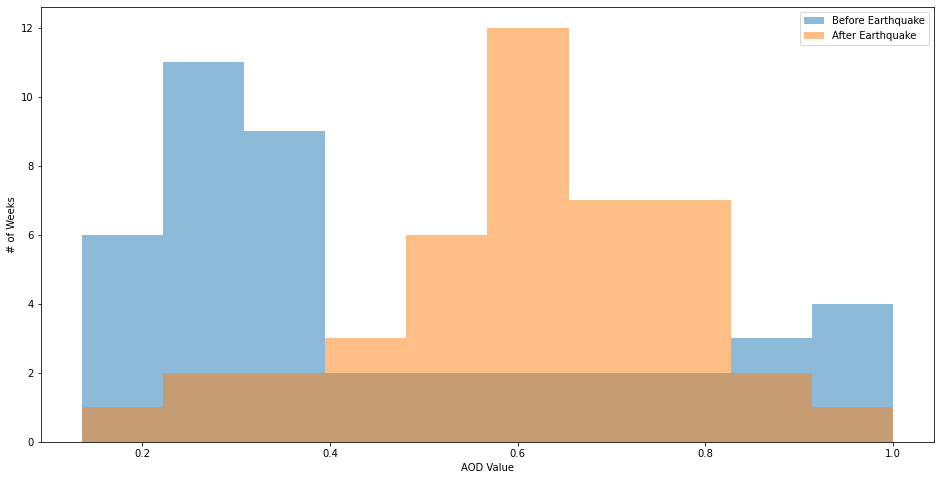

In [82]:
df_plotter=pd.DataFrame(zip(a_data.ravel(),b_data.ravel()),columns=["Before Earthquake","After Earthquake"])
plotter=df_plotter.plot.hist( legend=True,figsize=(16,8),alpha=0.5)
plotter.set_xlabel("AOD Value")
plotter.set_ylabel("# of Weeks")


# Conclusion: MODIS AOD cannot detect even large-scale changes in local emissions in Nepal
Based on the finding that the AOD actually increased by 33% in the period following the earthquake, even very large scale reductions in emissions are undetectable from this satellite area. Perhaps if a satellite constellation is available which can measure AOD on a much less coarse resolution (MODIS is, after all, 10x10km), this would be possible. But, then again, the aerosol concentrations in the region of Nepal must be dominated by emission sources from India, Pakistan, and China, all much larger countries with far higher levels of emissions. All in all, it seems well nigh impossible that MODIS AOD could ever be used to detect small scale trends in black carbon emissions in Nepal. 